# Part 1 | EDA of Petrignano Data Set

# Background
The [Acea Group](https://www.gruppo.acea.it/en) is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.

# Evaluation 
This is an analysis using four data sets from the Analytics Competition in Kaggle for the Acea Group.

In [1]:
#pip install matplotlib

# 1. Packages

In [5]:
# Base 
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Missing Value
# -----------------------------------
#!pip install missingno
import missingno as msno

# Configuration
# -----------------------------------
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

from termcolor import colored

# 2. Load Data 

In [10]:
# Import
aq_petrignano = pd.read_csv("Data/Aquifer_Petrignano.csv")

#lakeBilancino = pd.read_csv("Data/Lake_Bilancino.csv")
#riverArno = pd.read_csv("Data/River_Arno.csv")
#ws_Amiata = pd.read_csv("Data/Spring_Amiata.csv")
#ws_Lupa = pd.read_csv("Data/Spring_Lupa.csv")
#ws_Madonna = pd.read_csv("Data/Spring_Madonna_di_Canneto.csv")
print("All files uploade successfully.")

All files uploade successfully.


#### 2.1 Feature Engineer a new Columns to map seasonal trends 

In [11]:
try:
    # Attempt to convert the 'Date' column to datetime format
    aq_petrignano['Date'] = pd.to_datetime(aq_petrignano['Date'], format='%d/%m/%Y')

    # Extract the year and month from the 'Date' column as integers
    aq_petrignano['Year'] = aq_petrignano['Date'].dt.year
    aq_petrignano['Month'] = aq_petrignano['Date'].dt.month

    # If successful, proceed with extracting the month and assigning seasons
    months = aq_petrignano['Date'].dt.month

    # Define conditions for the seasons
    conditions = [
        months.isin([3, 4, 5]),
        months.isin([6, 7, 8]),
        months.isin([9, 10, 11]),
        months.isin([1, 2, 12])
    ]

    # Define the season names corresponding to the conditions
    season_names = ["Spring", "Summer", "Autumn", "Winter"]

    # Use numpy's select function to apply the conditions and assign season names
    aq_petrignano['Season'] = np.select(conditions, season_names)

    # Print completion status
    print("Operation completed successfully. The 'Year', 'Month', and 'Season' columns have been added to the DataFrame.")

except Exception as e:
    # If an error occurs during the date conversion, print an error message
    print(f"An error occurred during date conversion or processing: {e}")


Operation completed successfully. The 'Year', 'Month', and 'Season' columns have been added to the DataFrame.


In [12]:
# Assuming aq_petrignano is your DataFrame and it has a column named 'Date'

try:
    # Attempt to convert the 'Date' column to datetime format
    aq_petrignano['Date'] = pd.to_datetime(aq_petrignano['Date'], format='%d/%m/%Y')

    # If successful, proceed with extracting the month and assigning seasons
    months = aq_petrignano['Date'].dt.month

    # Define conditions for the seasons
    conditions = [
        months.isin([3, 4, 5]),
        months.isin([6, 7, 8]),
        months.isin([9, 10, 11]),
        months.isin([1, 2, 12])
    ]

    # Define the season names corresponding to the conditions
    season_names = ["Spring", "Summer", "Autumn", "Winter"]

    # Use numpy's select function to apply the conditions and assign season names
    aq_petrignano['Season'] = np.select(conditions, season_names)

    # Print completion status
    print("Operation completed successfully. The 'Season' column has been added to the DataFrame.")

except Exception as e:
    # If an error occurs during the date conversion, print an error message
    print(f"An error occurred during date conversion or processing: {e}")


Operation completed successfully. The 'Season' column has been added to the DataFrame.


In [13]:
# Rename columns by removing '_to_Groundwater' for those starting with 'Depth'
aq_petrignano.rename(columns=lambda x: x.replace('Temperature_', 'Temp_') if x.startswith('Temperature') else x, inplace=True)

# Rename columns by removing '_to_Groundwater' for those starting with 'Depth'
aq_petrignano.rename(columns=lambda x: x.replace('_to_Groundwater', '') if x.startswith('Depth') else x, inplace=True)

# Display the updated DataFrame
print('Remaned columns starting with Depth and Temperature.')

Remaned columns starting with Depth and Temperature.


# 3. Visualize Data Gaps

In [16]:
aq_petrignano['Date'].head(2)

0   2006-03-14
1   2006-03-15
Name: Date, dtype: datetime64[ns]

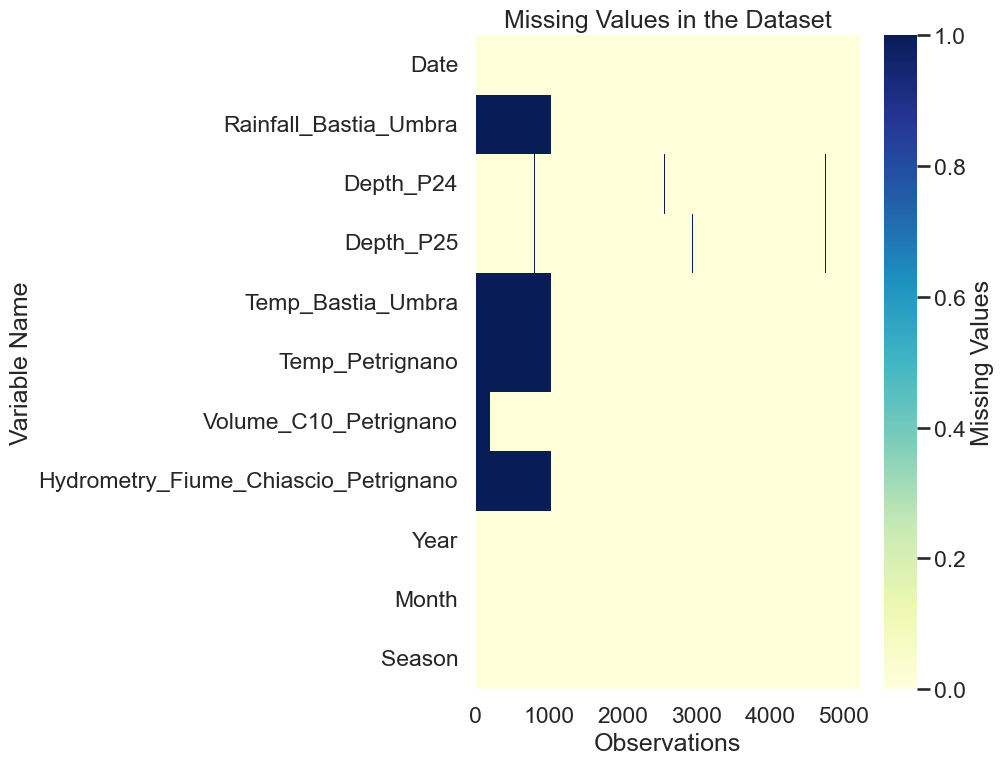

In [17]:
def plot_missing_values_heatmap(df):
    """
    Plots a heatmap of missing values for the given DataFrame.
    
    Parameters:
    - df: pd.DataFrame. The DataFrame for which to plot the missing values heatmap.
    """
    # Check for missing values and transpose the DataFrame
    missing_values = df.isna().transpose()
    
    # Create a heatmap of missing values with swapped axes
    plt.figure(figsize=(10, 8))
    sns.heatmap(missing_values, cmap='YlGnBu', cbar_kws={'label': 'Missing Values'}, 
                xticklabels=1000, yticklabels=True)
    plt.xlabel('Observations')
    plt.ylabel('Variable Name')
    plt.title('Missing Values in the Dataset')

    # Custom theme adjustments
    sns.set_style("white")
    sns.set_context("talk")
    plt.xticks(rotation=0)  # No need to rotate the ticks as they are numbers
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage (assuming 'aq_petrignano' is your DataFrame):
plot_missing_values_heatmap(aq_petrignano)

### Select a start point for target variables and further data visualization.

In [18]:
# Identify columns that contain 'Depth'
depth_columns = [col for col in aq_petrignano.columns if 'Depth' in col]

# Find the first row where all 'Depth' columns are non-NaN
first_valid_index = aq_petrignano.dropna(subset=depth_columns, how='any').index.min()

# Drop all rows above the identified row
aq_petrignano = aq_petrignano.loc[first_valid_index:].reset_index(drop=True)

# Display the first few rows to verify the changes
print('Set starting row to first row where all target features are non-NaN.')

Set starting row to first row where all target features are non-NaN.


In [20]:
aq_petrignano['Date'].head(2)

0   2006-03-14
1   2006-03-15
Name: Date, dtype: datetime64[ns]

# 4. Visualize Target Variables

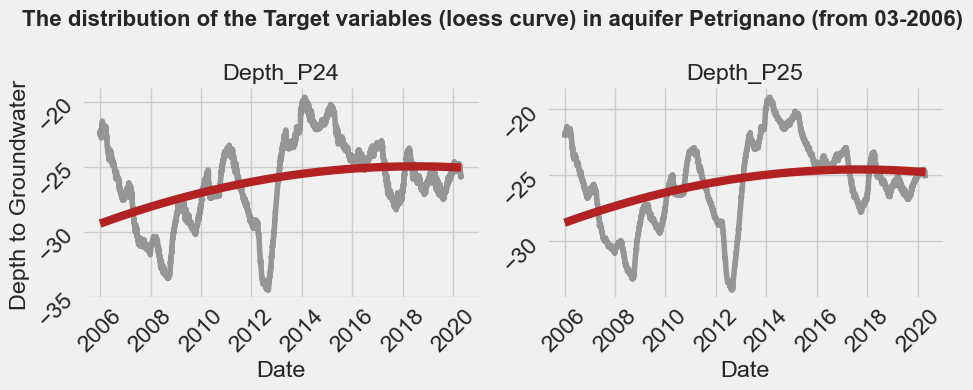

In [37]:
from matplotlib.dates import DateFormatter

# Dynamically select the relevant columns using list comprehension
columns = ['Date'] + [f'Depth_P{i}' for i in range(24, 26)]
df_selected = aq_petrignano[columns]

# Melt the DataFrame
df_melted = pd.melt(df_selected, id_vars=['Date'], var_name='Pozzo', value_name='Depth')

# Convert 'Date' to a numeric type (days since a reference date)
reference_date = pd.Timestamp('2006-03-14')
df_melted['Days'] = (pd.to_datetime(df_melted['Date']) - reference_date).dt.days

# Set the plot style
plt.style.use('fivethirtyeight')

# Create the plots
g = sns.FacetGrid(df_melted, col='Pozzo', col_wrap=3, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.lineplot, x='Days', y='Depth', color='gray', alpha=0.8)
# Note: We're plotting against 'Days' now, and will adjust labels later
g.map_dataframe(lambda data, **kws: sns.regplot(data=data, x='Days', y='Depth', scatter=False, order=2, **kws), color='firebrick')

# Adjust the x-axis to display dates properly
date_formatter = DateFormatter('%Y')
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(date_formatter)
    ax.set_xticks(range(0, (pd.to_datetime('2020-06-30') - reference_date).days, 365*2))  # Every two years
    ax.tick_params(labelrotation=45)

# Convert 'Days' back to dates on x-axis labels for readability
def format_date(x, pos=None):
    return pd.to_datetime(reference_date + pd.to_timedelta(x, unit='D')).strftime('%Y')

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_date))

# Add titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Date', 'Depth to Groundwater')
g.fig.suptitle('The distribution of the Target variables (loess curve) in aquifer Petrignano (from 03-2006)', 
               fontsize=16, fontweight='bold', x=0.35)


plt.subplots_adjust(top=0.80)
plt.tight_layout()
plt.show()

# 5. Correlation (Spearman) across Features and Target Variables 

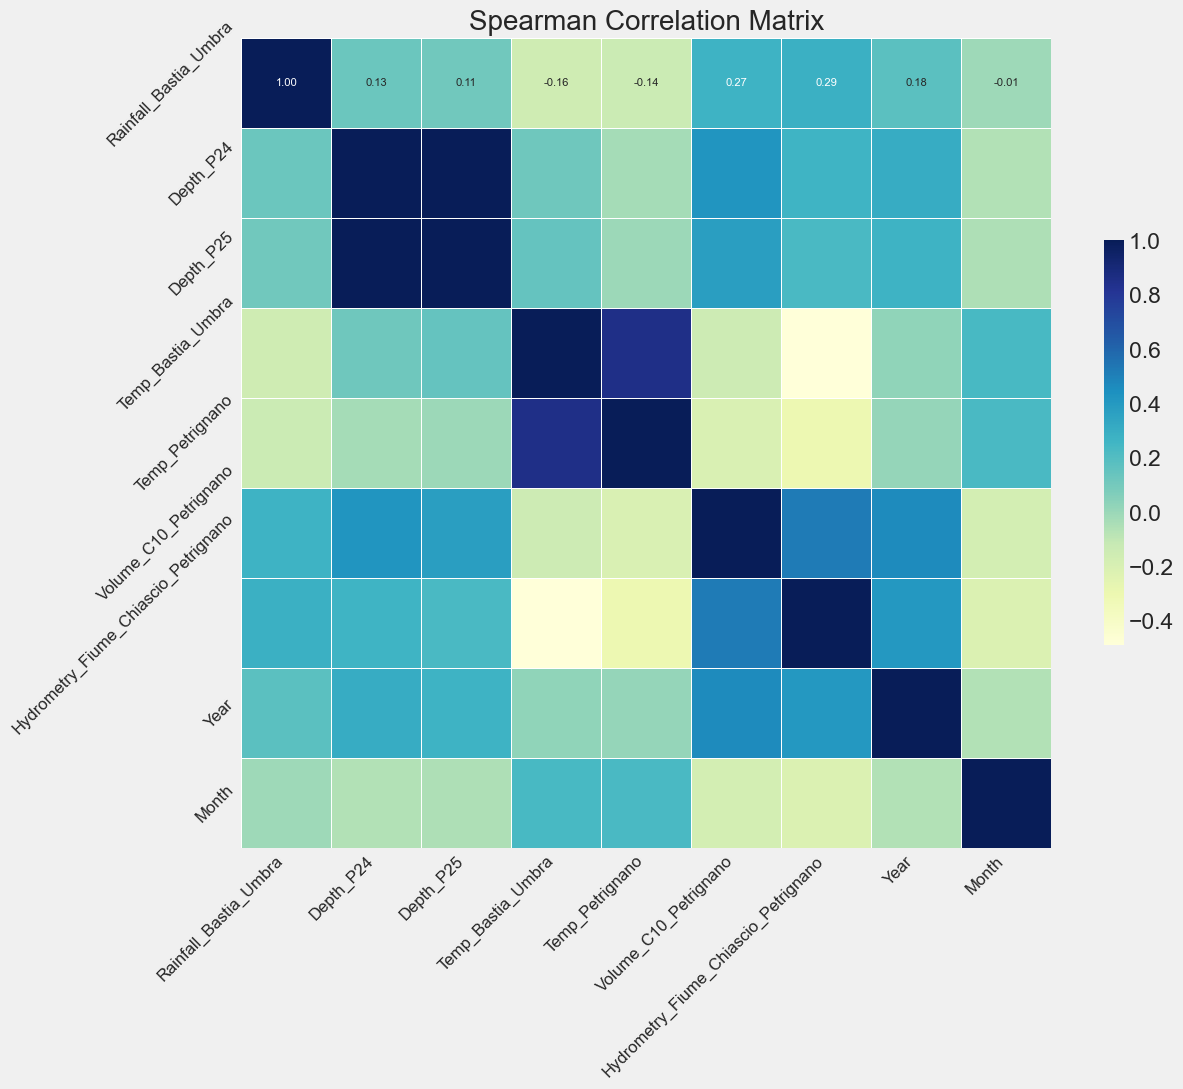

In [39]:
# Assuming 'aq_petrignano' is your DataFrame
# Exclude 'Date' and 'Season' columns and select only numeric columns
aq_petrignano_filtered = aq_petrignano.drop(columns=['Date', 'Season']).select_dtypes(include=[np.number])

# Drop rows with any missing values in these numeric columns
aq_petrignano_filtered = aq_petrignano_filtered.dropna()

# Calculate the Spearman correlation matrix
corr_matrix = aq_petrignano_filtered.corr(method='spearman')

# Visualize the correlation matrix using seaborn with the YlGnBu color palette
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', 
            cbar=True, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot_kws={"size": 8})

# Adjust font size for xticks and yticks to make them more legible but smaller than the title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Smaller font size for xticks
plt.yticks(rotation=45, fontsize=12)  # Smaller font size for yticks

# Specify a larger font size for the title for emphasis
plt.title('Spearman Correlation Matrix', fontsize=20)  # Larger font size for the title
plt.show()

# 6. Visualize Feature Variables

## 6.1 Feature Variables - Rainfall 

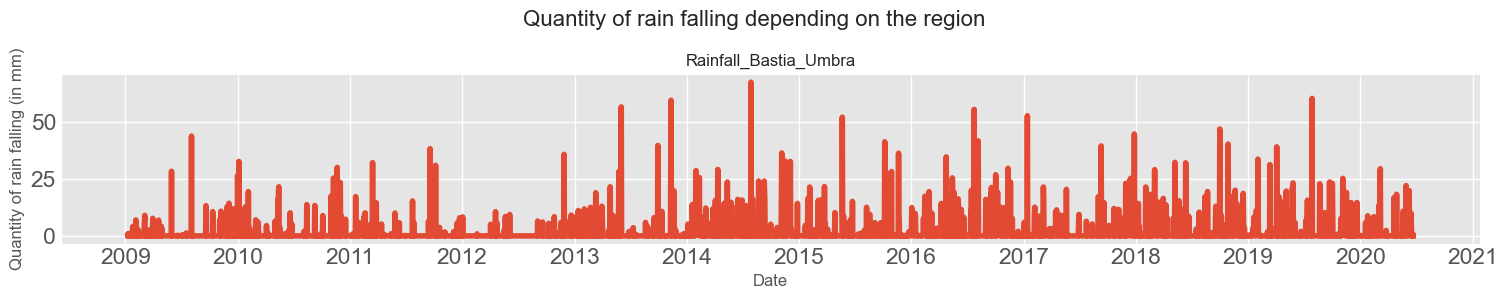

In [40]:
import matplotlib.dates as mdates

# Using list comprehension to select columns that start with 'Rainfall_'
rainfall_columns = [col for col in aq_petrignano.columns if col.startswith('Rainfall_')]

# Ensuring 'Date' is included for the melting process
selected_columns = ['Date'] + rainfall_columns

# Now, using these selected columns
aq_petrignano_selected = aq_petrignano[selected_columns]

# Melting the DataFrame to long format
aq_petrignano_melted = aq_petrignano_selected.melt(id_vars=["Date"], var_name="Location", value_name="Rainfall")

# Plotting
plt.style.use('ggplot')  # Using ggplot style for a base aesthetic

# Modifying here to plot graphs one on top of the other and to avoid title/label overlap
g = sns.FacetGrid(aq_petrignano_melted, row="Location", height=3, aspect=5)  # Adjust 'height' and 'aspect' for better fit
g.map_dataframe(sns.lineplot, x="Date", y="Rainfall")
g.set_axis_labels("Date", "Quantity of rain falling (in mm)")
g.set_titles(row_template="{row_name}")
g.fig.subplots_adjust(top=0.9, hspace=0.3)  # Adjust 'hspace' for spacing between plots
g.fig.suptitle('Quantity of rain falling depending on the region', fontsize=16, y=0.98)  # Adjust 'y' for title spacing
g.add_legend()

# Customizing further if needed, e.g., adjusting date format on x-axis, color palette
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Show only year on x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format x-axis labels to show only the year

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

## 6.2 Feature Variables - Temperature 

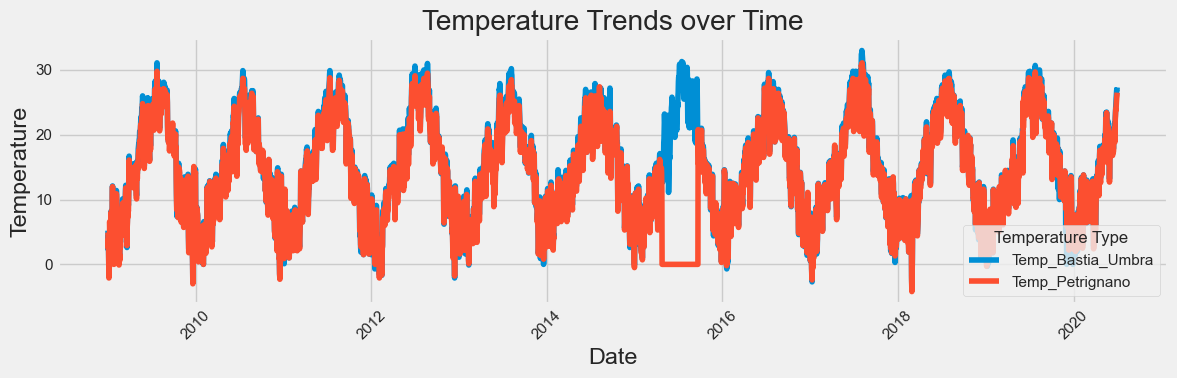

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'aq_petrignano' is your DataFrame and it's already loaded

# Filter columns that contain 'Temp' in their name and the 'Date' column
temp_columns = [col for col in aq_petrignano.columns if 'Temp' in col]
temp_columns_with_date = temp_columns + ['Date']

# Melt the DataFrame to long format for plotting
aq_petrignano_long = pd.melt(aq_petrignano[temp_columns_with_date], id_vars='Date', var_name='Temperature_Type', value_name='Temperature_Value')

# Set the style
sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')  # Applying a style similar to theme_fivethirtyeight

# Create the line plot with seaborn
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
sns.lineplot(data=aq_petrignano_long, x='Date', y='Temperature_Value', hue='Temperature_Type')

# Customize the plot
plt.title('Temperature Trends over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(title='Temperature Type')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to not cut off labels

# Display the plot

plt.show()


## 6.3 Feature Variables - Volume 

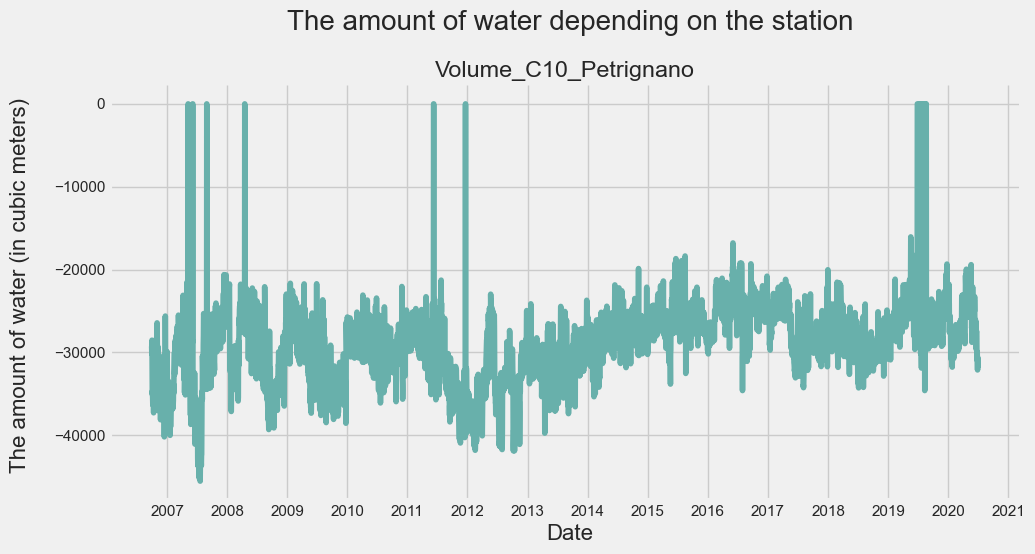

In [69]:
# Assuming 'aq_petrignano' is your DataFrame and 'Date' is the index
# Resetting index to use 'Date' as a column
aq_petrignano_reset = aq_petrignano.reset_index()

# Identifying the column with the prefix "Volume"
volume_column = [col for col in aq_petrignano_reset.columns if col.startswith('Volume')]

# Checking if there's only one column with the prefix "Volume"
if len(volume_column) == 1:
    # Selecting specified columns
    columns_to_select = ['Date'] + volume_column

    # Selecting specified columns
    aq_petrignano_filtered = aq_petrignano_reset[columns_to_select]

    # Reshaping the DataFrame from wide to long format
    aq_petrignano_long = pd.melt(aq_petrignano_filtered, id_vars=['Date'], var_name='Pozzo', value_name='Volume')

    # Setting the plot style to mimic FiveThirtyEight, as closely as possible
    plt.style.use('fivethirtyeight')

    # Adjusting the size for better readability and specifying a single color for all plot lines
    g = sns.FacetGrid(aq_petrignano_long, col='Pozzo', hue='Pozzo', col_wrap=2, height=5, aspect=2, palette=["#68b0ab"])  # blue-green color
    g = g.map(plt.plot, 'Date', 'Volume', marker='')

    # Customizing the plot further to match specific requirements
    g.set_titles("{col_name}")
    g.set_xlabels("Date")

    # Customizing date format on x-axis
    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(DateFormatter('%Y'))

    # Removing the individual y-axis labels and setting a common one
    for ax in g.axes.flat:
        ax.set_ylabel('')  # Remove the y-labels for individual plots
        ax.set_xlabel('')

    # Adjusting the layout to create more space for the y-axis title
    g.fig.subplots_adjust(left=0.07, top=0.9, bottom=0.07)  # Adjust bottom to create space for the common x-axis label

    # Adding a common y-axis label
    g.fig.text(0.02, 0.5, 'The amount of water (in cubic meters)', va='center', rotation='vertical', fontsize=16)

    # Adding a common x-axis label at the bottom center with font size 20
    g.fig.text(0.3, -0.01, 'Date', ha='center', fontsize=16)

    # Adjusting the main title position and setting the subtitle
    g.fig.suptitle('The amount of water depending on the station', fontsize=20, y=1.05, x=0.30)  # Raised and centered
    g.fig.subplots_adjust(top=0.90)  # Adjusting top to make space for the suptitle

    # Removing the legend
    if g.legend is not None:
        g.legend.remove()
    #plt.tight_layout()
    plt.show()
else:
    print("Multiple columns with prefix 'Volume' found. Please verify the data.")

## 6.4 Feature Variables - Hydrometry 

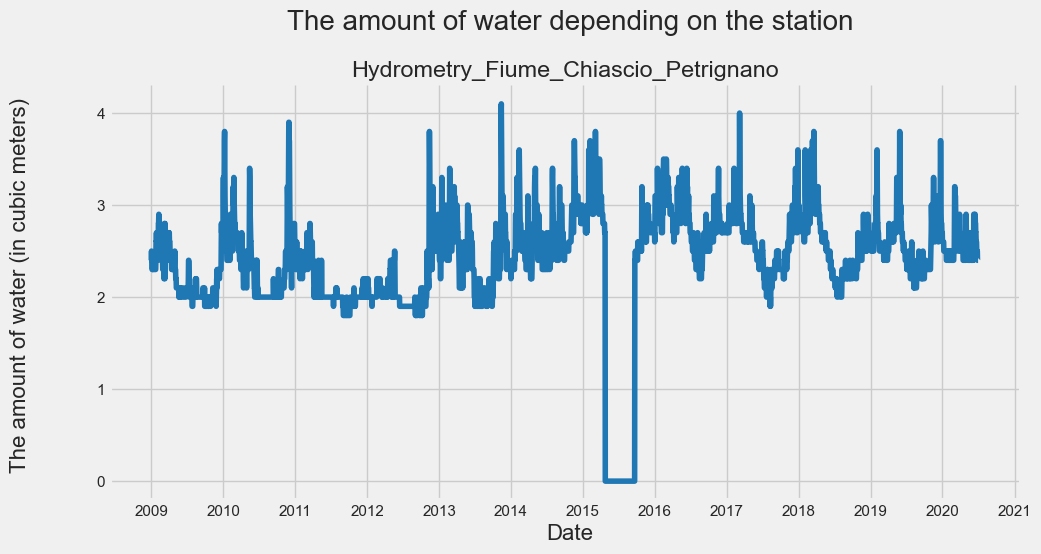

In [76]:
# Assuming 'aq_petrignano' is your DataFrame and 'Date' is the index
# Resetting index to use 'Date' as a column
aq_petrignano_reset = aq_petrignano.reset_index()

# Identifying the column with the prefix "Hydrometry"
hydrometry_column = [col for col in aq_petrignano_reset.columns if col.startswith('Hydrometry')]

# Checking if there's only one column with the prefix "Hydrometry"
if len(hydrometry_column) == 1:
    # Selecting specified columns
    columns_to_select = ['Date'] + hydrometry_column

    # Selecting specified columns
    aq_petrignano_filtered = aq_petrignano_reset[columns_to_select]

    # Reshaping the DataFrame from wide to long format
    aq_petrignano_long = pd.melt(aq_petrignano_filtered, id_vars=['Date'], var_name='Pozzo', value_name='Hydrometry')

    # Setting the plot style to mimic FiveThirtyEight, as closely as possible
    plt.style.use('fivethirtyeight')

    # Adjusting the size for better readability and specifying a single color for all plot lines
    g = sns.FacetGrid(aq_petrignano_long, col='Pozzo', hue='Pozzo', col_wrap=2, height=5, aspect=2, palette=["#1f77b4"])  # dark blue color
   
    g = g.map(plt.plot, 'Date', 'Hydrometry', marker='')

    # Customizing the plot further to match specific requirements
    g.set_titles("{col_name}")
    g.set_xlabels("Date")

    # Customizing date format on x-axis
    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(DateFormatter('%Y'))

    # Removing the individual y-axis labels and setting a common one
    for ax in g.axes.flat:
        ax.set_ylabel('')  # Remove the y-labels for individual plots
        ax.set_xlabel('')

    # Adjusting the layout to create more space for the y-axis title
    g.fig.subplots_adjust(left=0.07, top=0.9, bottom=0.07)  # Adjust bottom to create space for the common x-axis label

    # Adding a common y-axis label
    g.fig.text(0.02, 0.5, 'The amount of water (in cubic meters)', va='center', rotation='vertical', fontsize=16)

    # Adding a common x-axis label at the bottom center with font size 20
    g.fig.text(0.3, -0.01, 'Date', ha='center', fontsize=16)

    # Adjusting the main title position and setting the subtitle
    g.fig.suptitle('The amount of water depending on the station', fontsize=20, y=1.05, x=0.30)  # Raised and centered
    g.fig.subplots_adjust(top=0.90)  # Adjusting top to make space for the suptitle

    # Removing the legend
    if g.legend is not None:
        g.legend.remove()
    #plt.tight_layout()
    plt.show()
else:
    print("Multiple columns with prefix 'Volume' found. Please verify the data.")

## 6.4 Is there noticable seasonal trend with the Depth Variables

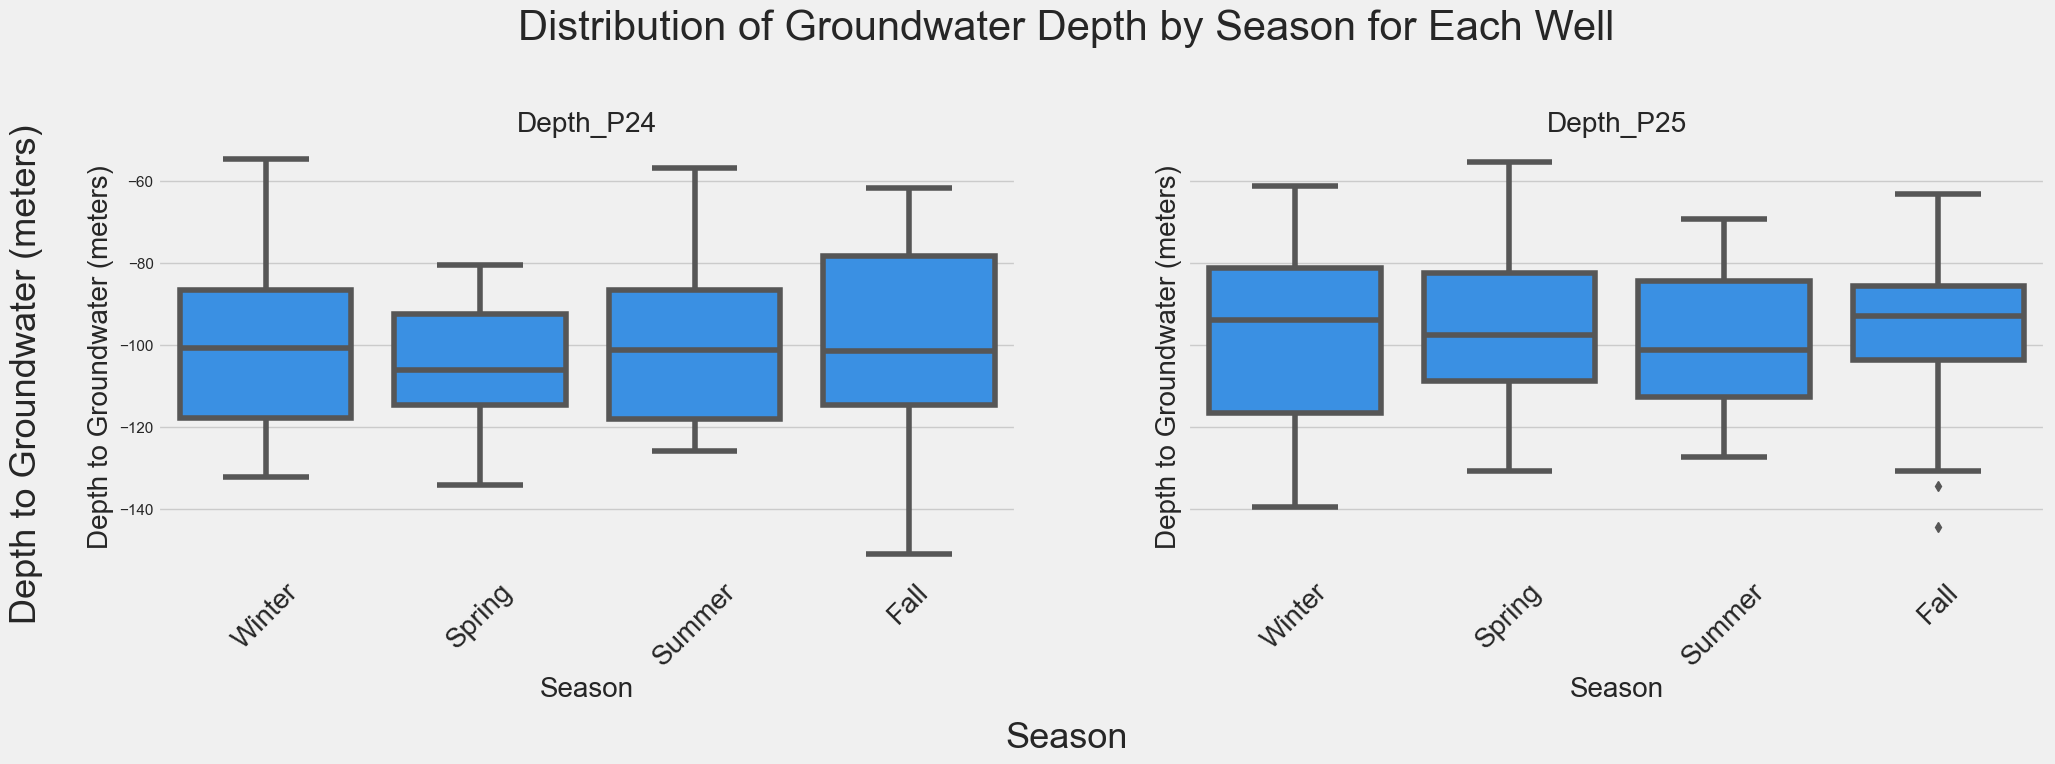

In [78]:
# Assuming 9 wells and 4 seasons, with some random depth values and NaNs
petrignano_targets = aq_petrignano.copy()

np.random.seed(0)  # For reproducibility
wells = [f"Depth_P{i}" for i in range(24, 26)]
seasons = ["Winter", "Spring", "Summer", "Fall"] * 25
depths = np.random.normal(loc=-100, scale=20, size=(100, 2))
depths = np.where(np.random.random(depths.shape) < 0.1, np.nan, depths)  # Introducing some NaNs

# Creating the DataFrame
petrignano_targets = pd.DataFrame(depths, columns=wells)
petrignano_targets["Season"] = np.tile(seasons, len(petrignano_targets) // len(seasons) + 1)[:len(petrignano_targets)]

# Adjusting the original code based on the user's request
# Including subplots for each well, handling NaN values, and setting box color to dodgerblue

# Selecting columns with prefix 'Depth'
selected_columns = ['Season'] + [col for col in petrignano_targets.columns if col.startswith('Depth')][:2]  # Selecting only the first two columns

# Selecting the relevant columns
df_selected = petrignano_targets[selected_columns]

# Melting the DataFrame
df_melted = df_selected.melt(id_vars='Season', var_name='Well', value_name='Depth').dropna()

# Creating subplots for each Pozzo
fig, axs = plt.subplots(1, 2, figsize=(20, 7), sharex=True, sharey=True)
fig.suptitle('Distribution of Groundwater Depth by Season for Each Well', fontsize=30, y=1.02)

for i, well in enumerate(df_selected.columns[1:]):
    ax = axs[i]
    sns.boxplot(x='Season', y='Depth', data=df_melted[df_melted['Well'] == well], ax=ax, color="dodgerblue")
    ax.set_title(well)
    # Ensuring individual x labels are visible and clear
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=20)
    # Removing individual x and y labels
    ax.set_xlabel('Season', fontsize=20)
    ax.set_ylabel('Depth to Groundwater (meters)', fontsize=20)

# Adding common X and Y labels with improved positioning and readability
fig.text(0.5, -0.02, 'Season', ha='center', va='center', fontsize=26)
fig.text(-0.02, 0.5, 'Depth to Groundwater (meters)', ha='center', va='center', rotation='vertical', fontsize=26)

plt.tight_layout(rect=[0.00, 0.00, 1, 0.99])
plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Adjusting subplot spacing

plt.show()

In [17]:
#aq_petrignano.head(2)

## 7. Is there Stationarity in the Target variables?

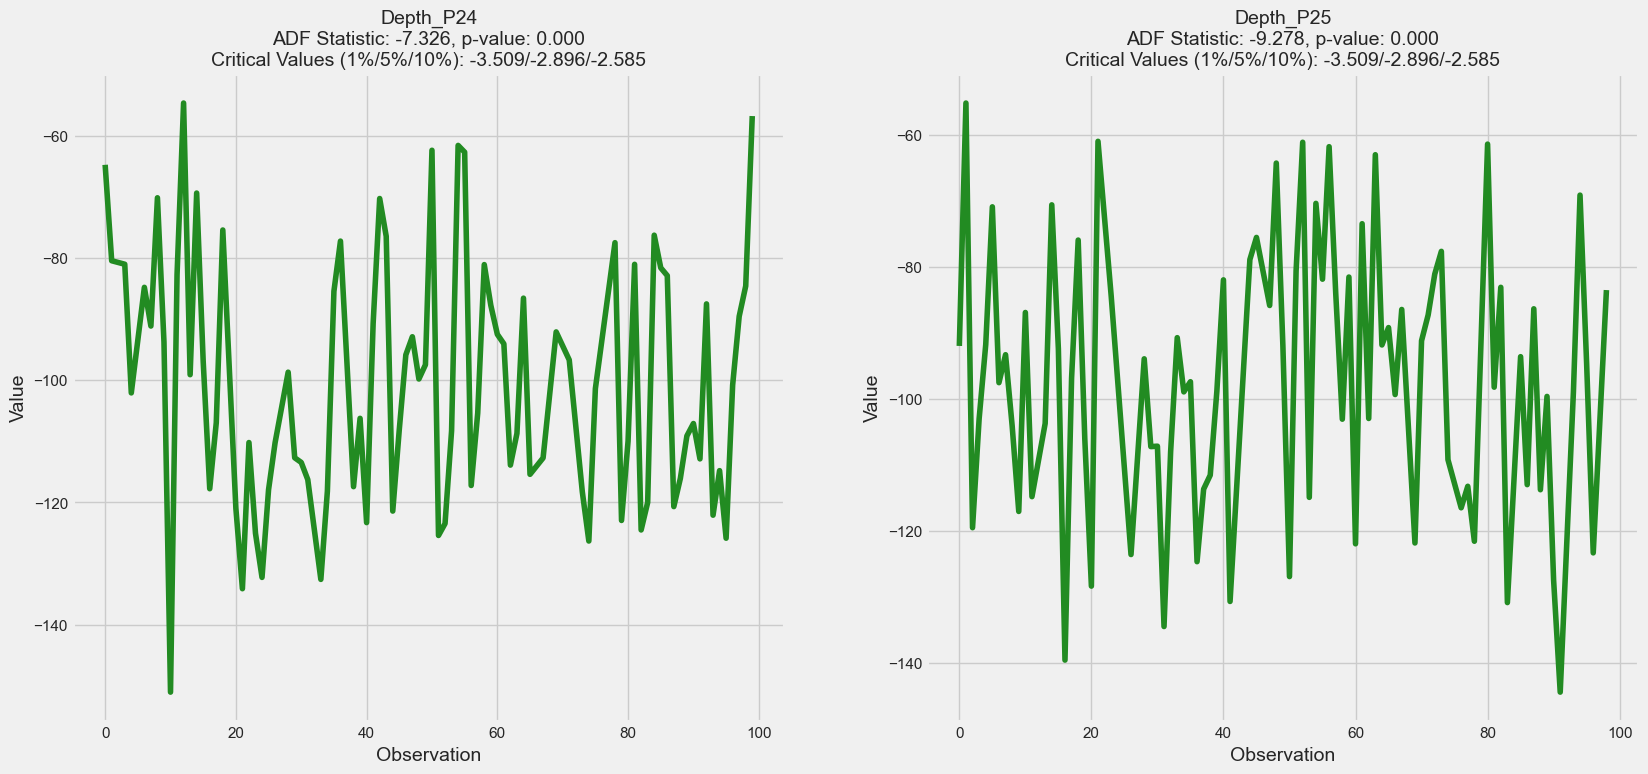

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series.dropna())  # Ensure to drop NA values for the test
    significance_level = 0.05  # Common threshold for statistical significance
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    # Determine line color based on statistical significance levels
    if (p_val < significance_level) & (adf_stat < crit_val_1):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'

    # Plot the series with the determined line color
    sns.lineplot(x=series.index, y=series, ax=ax, color=linecolor)
    # Set the plot title with statistical test results
    ax.set_title(f'{title}\nADF Statistic: {adf_stat:.3f}, p-value: {p_val:.3f}\nCritical Values (1%/5%/10%): {crit_val_1:.3f}/{crit_val_5:.3f}/{crit_val_10:.3f}', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)
    ax.set_xlabel('Observation', fontsize=14)

# Adjust subplot grid to 1x2 for one row of two plots
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))  # Adjust the figsize as needed

# Dynamically process and plot each 'Depth' column
depth_columns = [col for col in petrignano_targets.columns if 'Depth' in col]  # Adjust this line if the naming convention is different
for i, depth_col in enumerate(depth_columns):
    visualize_adfuller_results(petrignano_targets[depth_col], depth_col, axes[i])


## 8. What about Autocorrelation for the target variables?

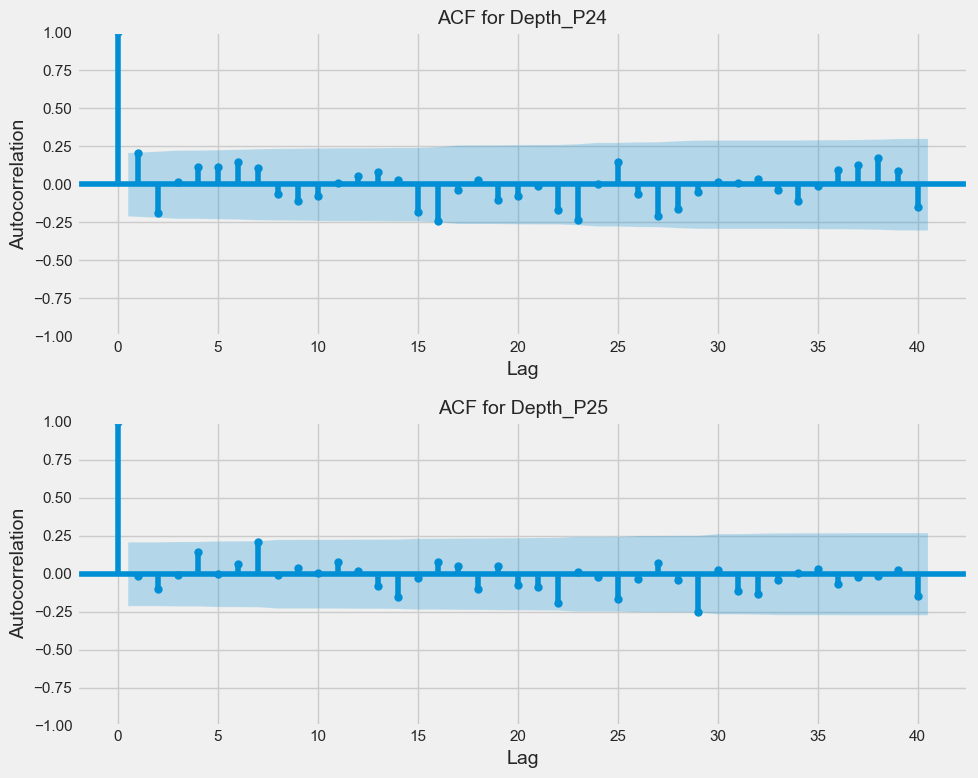

In [83]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Modified function to visualize ACF on a given time series
def visualize_acf(series, title, ax):
    # Plot the Autocorrelation Function (ACF)
    plot_acf(series.dropna(), ax=ax, lags=40)  # Adjust 'lags' as needed
    # Set the plot title
    ax.set_title(f'ACF for {title}', fontsize=14)
    ax.set_ylabel('Autocorrelation', fontsize=14)
    ax.set_xlabel('Lag', fontsize=14)

# Adjust subplot grid to 2x1 for two depth columns
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), dpi=100)

# Dynamically process and plot ACF for each 'Depth' column
depth_columns = [col for col in petrignano_targets.columns if 'Depth' in col]  # Adjust if the naming convention is different
for i, depth_col in enumerate(depth_columns):
    visualize_acf(petrignano_targets[depth_col], depth_col, axes[i])

plt.tight_layout()
plt.show()


### 8.1. Model Selection based on EDA

###  Model selection was determined based on lack of stationarity and the results of the Autocorrelation analysis performed on the target variables . In addition the high number of HaN values for several features. Therefore we will pursue both the Random Forrest and LSTM alogrithms 

#  Part 2 | Model Build/Train and Evaluation for Targets of Petrignano Data Set 

## 9. Random Forrest for Feature selection and Model evaluation of Target

In [84]:
# Assuming 'aq_petrignano' is your DataFrame
# To count the number of NaN values in each column
nan_count_per_column = aq_petrignano.isna().sum()
print("Count of NaN values per column:\n", nan_count_per_column)

# To display rows where any cell has NaN values
rows_with_nan = aq_petrignano[aq_petrignano.isna().any(axis=1)]
print("\nRows with NaN values:\n", rows_with_nan)

Count of NaN values per column:
 Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_P24                                 55
Depth_P25                                 39
Temp_Bastia_Umbra                       1024
Temp_Petrignano                         1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
Year                                       0
Month                                      0
Season                                     0
dtype: int64

Rows with NaN values:
            Date  Rainfall_Bastia_Umbra  Depth_P24  Depth_P25  \
0    2006-03-14                    NaN     -22.48     -22.18   
1    2006-03-15                    NaN     -22.38     -22.14   
2    2006-03-16                    NaN     -22.25     -22.04   
3    2006-03-17                    NaN     -22.38     -22.04   
4    2006-03-18                    NaN     -22.60     -22.04   
...         ...                    ...        ...  

### 9.1 Encode Season column for models

In [85]:
# Mapping for the season encoding
season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}

# Replace the "Season" column values based on the mapping
aq_petrignano['Season'] = aq_petrignano['Season'].map(season_mapping)

# Show the updated DataFrame to verify changes
print("Season column data encoded successfully.")

Season column data encoded successfully.


### 9.2 Impute NaN values for Target variables using Linear interpolation

In [86]:
# Identify columns that start with "Depth"
depth_columns = [col for col in aq_petrignano.columns if col.startswith('Depth')]

# Apply linear interpolation to these columns only
aq_petrignano[depth_columns] = aq_petrignano[depth_columns].interpolate(method='linear', axis=0)

# Check if there are still NaN values in these columns (optional)
nan_count_after_interpolation = aq_petrignano[depth_columns].isna().sum()
#print("Count of NaN values per depth column after interpolation:\n", nan_count_after_interpolation)

### 9.3 We will create a pipeline to process the data, build/train and identify top 10 Features for each Target 

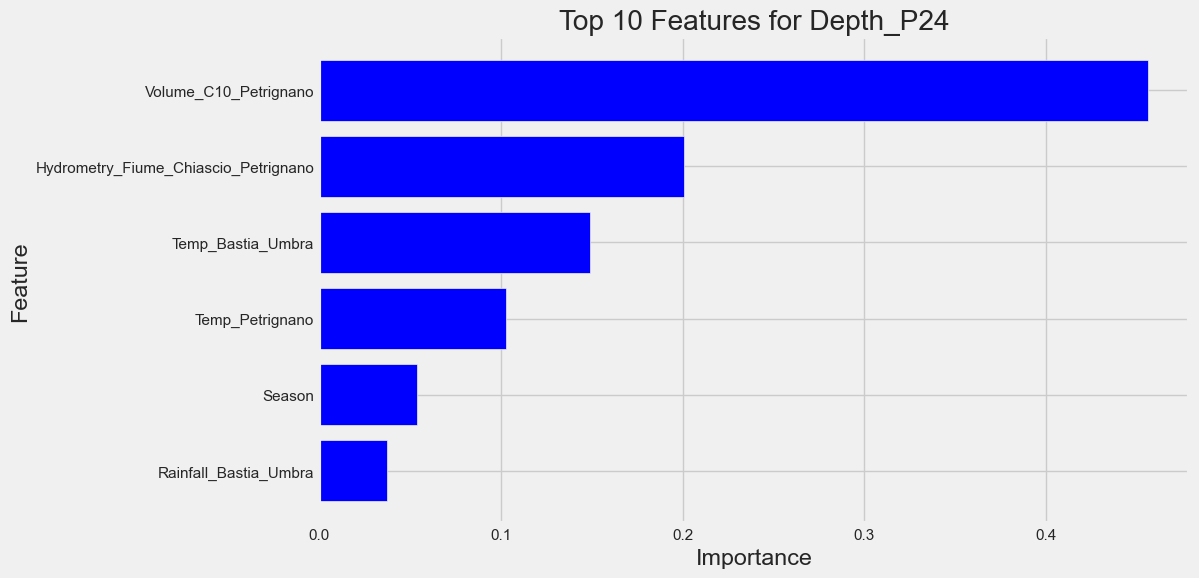

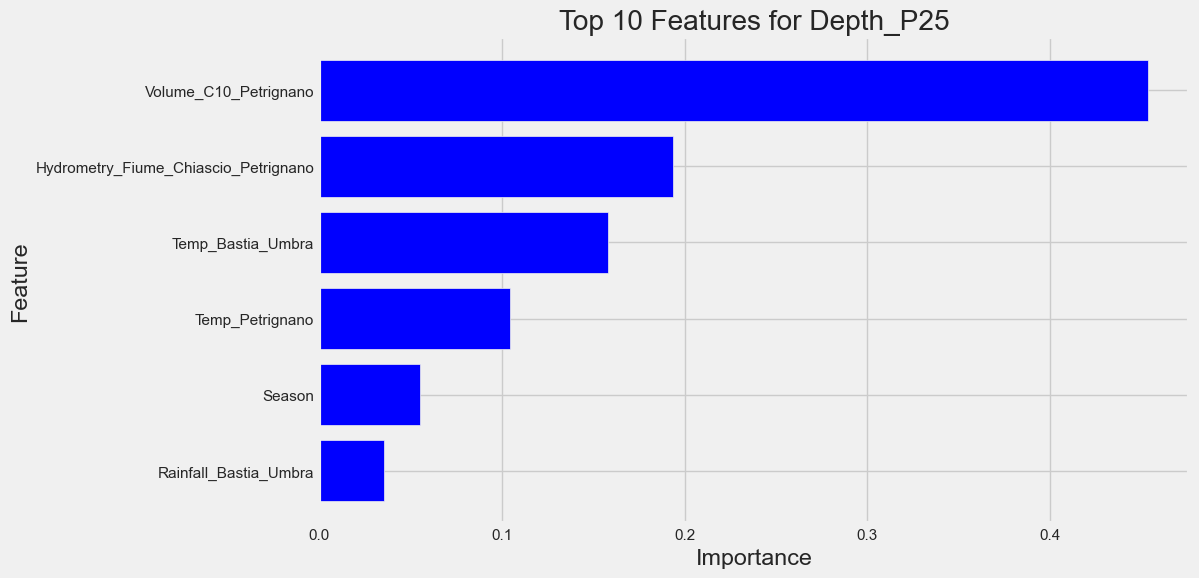

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Assuming 'aq_petrignano' is a pandas DataFrame already loaded with your data

# Initialize a dictionary to store top 10 features for each target variable
top_features_per_target = {}

# Preprocess the dataset
numerical_features = aq_petrignano.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if not col.startswith('Depth')]

numerical_transformer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
])

depth_targets = [col for col in aq_petrignano.columns if col.startswith('Depth')]

evaluation_metrics = []

for target in depth_targets:

    X = aq_petrignano.drop(columns=['Date'] + depth_targets)
    y = aq_petrignano[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    rf_pipeline.fit(X_train, y_train)

    importances = rf_pipeline.named_steps['model'].feature_importances_
    features = numerical_features  # Assuming only numerical features for simplicity
    top_10_features_indices = importances.argsort()[-10:][::-1]
    top_10_features = [features[i] for i in top_10_features_indices]

    # Store the top 10 features for the target variable in the dictionary
    top_features_per_target[target] = top_10_features

    # Plotting the top 10 features
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_features, [importances[i] for i in top_10_features_indices], color='blue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top 10 Features for {target}')
    plt.gca().invert_yaxis()
    plt.show()

    # Predict and evaluate
    predictions = rf_pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    evaluation_metrics.append({'Target Variable': target, 'MAE': mae, 'RMSE': rmse})

# Convert evaluation metrics into a DataFrame for visualization
metrics_df = pd.DataFrame(evaluation_metrics)
metrics_df = metrics_df.round(4)

#print(metrics_df)

# Example on how to access the top features for a specific target variable in the next script
# print(top_features_per_target['DepthTargetVariableName'])


### 9.4 Evaluate each model against the Target Variable

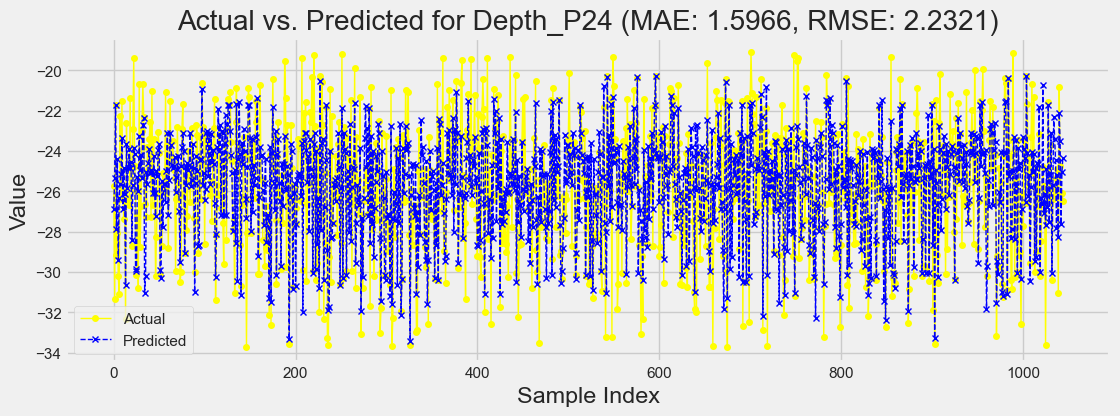

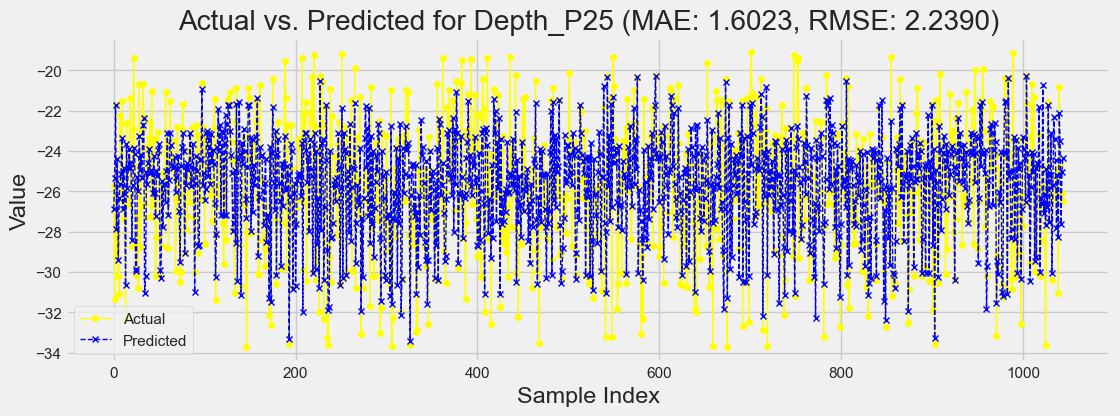

In [88]:
# Assuming the previous steps have been executed and we have the trained model and test data ready

for target, metrics in zip(depth_targets, evaluation_metrics):
    # Generate predictions for the current target
    predictions = rf_pipeline.predict(X_test)
    
    # Retrieve MAE and RMSE for the current target from the evaluation metrics
    mae = metrics['MAE']
    rmse = metrics['RMSE']
    
    # Plotting actual vs. predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(y_test.reset_index(drop=True), label='Actual', marker='o', linestyle='-', markersize=4, linewidth=1, color='yellow')  # Actual values in yellow
    plt.plot(predictions, label='Predicted', marker='x', linestyle='--', markersize=4, linewidth=1, color='blue')  # Predicted values in blue
    #plt.plot(y_test.reset_index(drop=True), label='Actual', marker='o', linestyle='-', markersize=5)
    #plt.plot(predictions, label='Predicted', marker='x', linestyle='--', markersize=5)
    plt.title(f'Actual vs. Predicted for {target} (MAE: {mae:.4f}, RMSE: {rmse:.4f})')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


### 9.5 Summary of Result for RandForrest Models by Target Variable

In [89]:
metrics_df.head(10)

,Target Variable,MAE,RMSE
0,Depth_P24,1.60,2.23
1,Depth_P25,1.60,2.24


It seems like we are ready to create the train and test sets to build models and make predictions

## 10. Create Train and Test LSTM models for Each Target

### 10.1 Create a pipeline to process the data, build, train and evaluate each Target Variable


Processing target: Depth_P24

Epoch 1/5

105/105 [==============================] - 4s 11ms/step - loss: 678.8974 - val_loss: 601.7361
Epoch 2/5
105/105 [==============================] - 0s 4ms/step - loss: 347.2429 - val_loss: 80.0281
Epoch 3/5
105/105 [==============================] - 0s 4ms/step - loss: 39.3955 - val_loss: 16.2051
Epoch 4/5
105/105 [==============================] - 0s 4ms/step - loss: 17.7988 - val_loss: 14.2434
Epoch 5/5
33/33 [==============================] - 1s 2ms/step


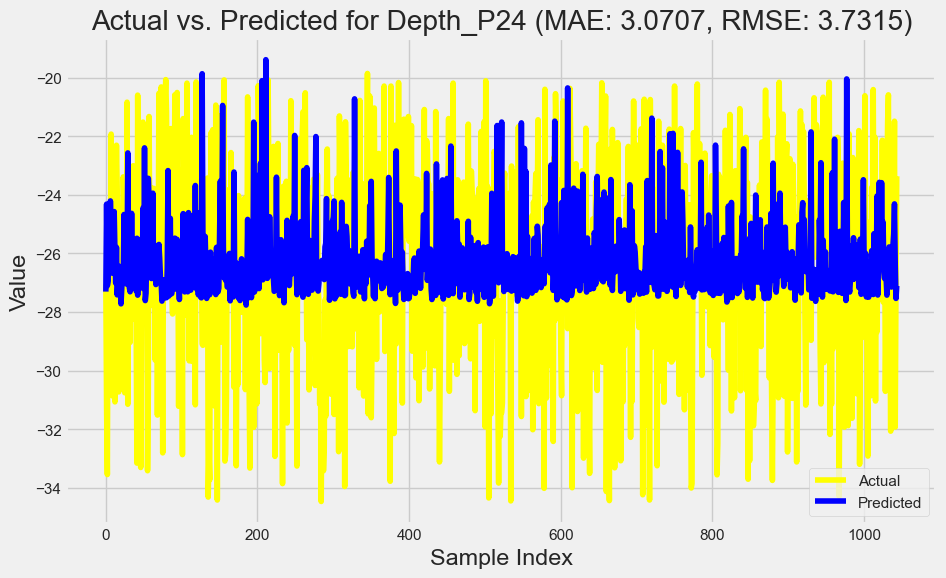

Processing target: Depth_P25
Epoch 1/5
105/105 [==============================] - 4s 11ms/step - loss: 647.8898 - val_loss: 574.7050
Epoch 2/5
105/105 [==============================] - 0s 4ms/step - loss: 341.1347 - val_loss: 89.5569
Epoch 3/5
105/105 [==============================] - 0s 4ms/step - loss: 42.0380 - val_loss: 15.7787
Epoch 4/5
105/105 [==============================] - 1s 5ms/step - loss: 16.5426 - val_loss: 12.8699
Epoch 5/5
33/33 [==============================] - 1s 2ms/step


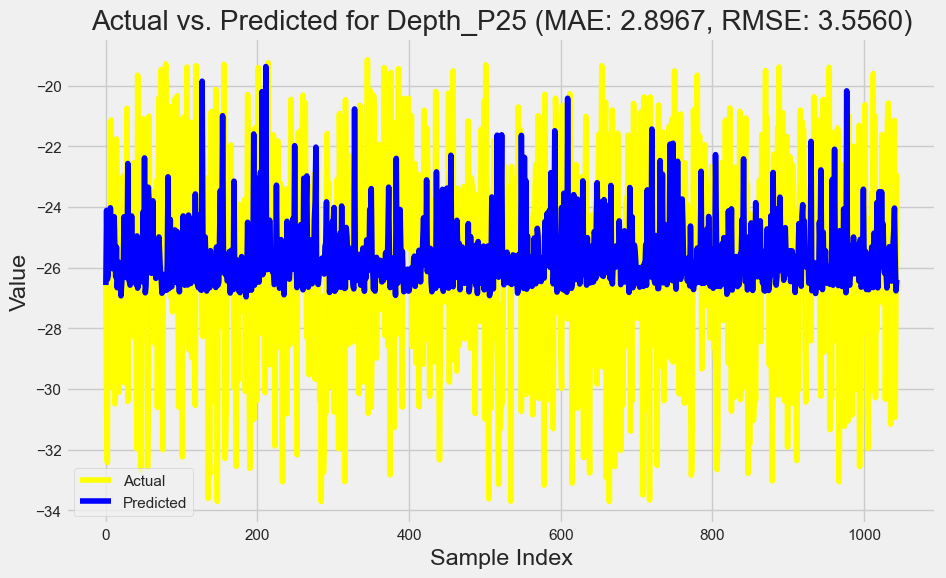

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming 'aq_petrignano' is your DataFrame and already loaded

# Initialize a list to store evaluation metrics for each target
metrics_list = []

# Handle NaN values in the features before scaling
imputer = SimpleImputer(strategy='mean')  # or another strategy like 'median'
aq_petrignano_imputed = aq_petrignano.copy()
aq_petrignano_imputed[aq_petrignano.columns.difference(['Date'] + depth_targets)] = imputer.fit_transform(aq_petrignano[aq_petrignano.columns.difference(['Date'] + depth_targets)])

# Identify feature and target columns
feature_columns = aq_petrignano_imputed.columns.difference(['Date'] + depth_targets)  # Exclude 'Date' and target columns
target_columns = depth_targets  # Assuming this is a list of target variable names

# Preprocess the data: scale only the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(aq_petrignano_imputed[feature_columns])

# Function to transform data into sequences (assuming daily frequency)
def create_sequences(features, targets, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features[i:(i + n_steps), :])
        y.append(targets[i + n_steps])  # targets are not scaled
    return np.array(X), np.array(y)

# Number of previous days to use for predicting the next day's value
n_steps = 3
n_features = scaled_features.shape[1]  # Updated to use only features

for target in target_columns:
    print(f"Processing target: {target}")
    
    # Extract the target data
    target_data = aq_petrignano_imputed[target].values  # Directly use the numerical values, not scaled
    
    # Create sequences using only the features and the target
    X, y = create_sequences(scaled_features, target_data, n_steps)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define and compile the LSTM model with dropout and adjusted learning rate
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(n_steps, n_features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)
    
    # Train the model with validation split and EarlyStopping
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])
    
    # Predict and evaluate
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Add the metrics to the list as a dictionary
    metrics_list.append({'Target Variable': target, 'MAE': mae, 'RMSE': rmse})      
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual', color='yellow')
    plt.plot(predictions, label='Predicted', color='blue')
    plt.title(f'Actual vs. Predicted for {target} (MAE: {mae:.4f}, RMSE: {rmse:.4f})')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the final metrics DataFrame
#print(metrics_df)



In [91]:
metrics_df.head(10)

,Target Variable,MAE,RMSE
0,Depth_P24,3.07,3.73
1,Depth_P25,2.90,3.56


### 10.2 Using top ten features from Random Forrest in LSTM Models to build/train and evaluate Targets

Processing target: Depth_P24
Epoch 1/5
105/105 [==============================] - 4s 11ms/step - loss: 685.6140 - val_loss: 628.7361
Epoch 2/5
105/105 [==============================] - 0s 5ms/step - loss: 421.4119 - val_loss: 139.2285
Epoch 3/5
105/105 [==============================] - 0s 4ms/step - loss: 65.0439 - val_loss: 21.6994
Epoch 4/5
105/105 [==============================] - 0s 4ms/step - loss: 19.3713 - val_loss: 12.9788
Epoch 5/5
33/33 [==============================] - 1s 2ms/step


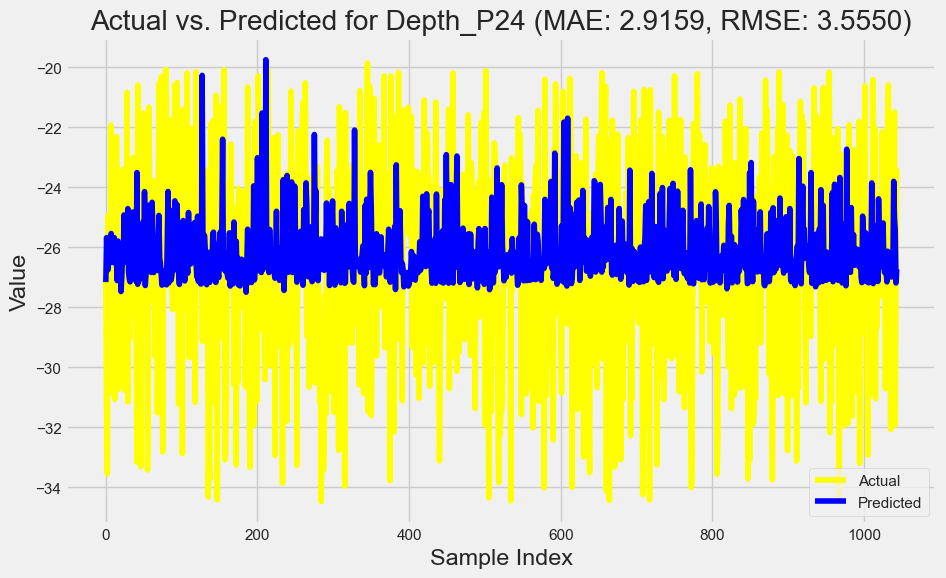

Processing target: Depth_P25
Epoch 1/5
105/105 [==============================] - 4s 11ms/step - loss: 644.1199 - val_loss: 567.5120
Epoch 2/5
105/105 [==============================] - 0s 4ms/step - loss: 321.4850 - val_loss: 61.0146
Epoch 3/5
105/105 [==============================] - 0s 4ms/step - loss: 29.4629 - val_loss: 15.0758
Epoch 4/5
105/105 [==============================] - 0s 5ms/step - loss: 17.5327 - val_loss: 14.1954
Epoch 5/5
33/33 [==============================] - 1s 2ms/step


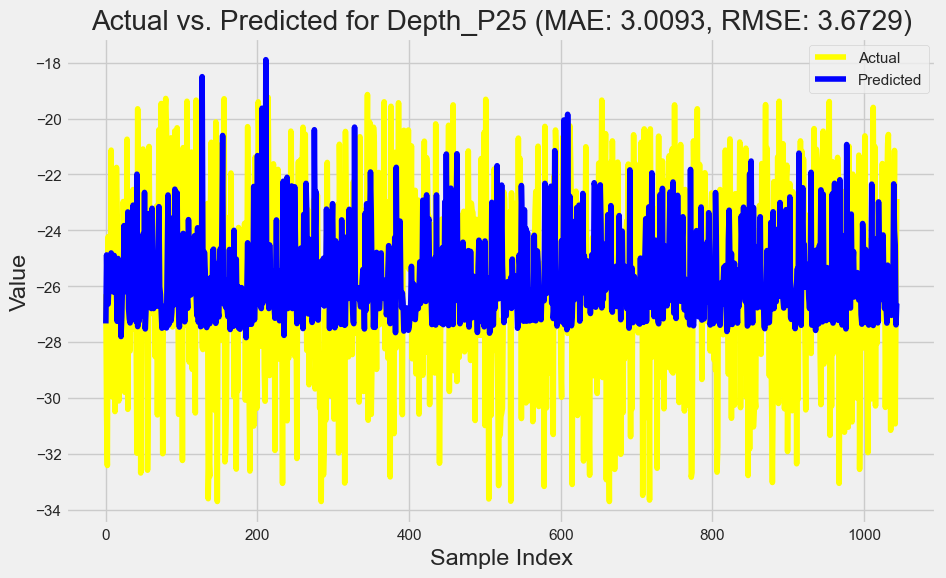

In [92]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming 'aq_petrignano' is your DataFrame and already loaded
# Also assuming 'top_features_per_target' is a dictionary containing the top 10 features for each target

# Initialize a list to store evaluation metrics for each target
metrics_list = []

# Handle NaN values in the features before scaling
imputer = SimpleImputer(strategy='mean')
aq_petrignano_imputed = aq_petrignano.copy()
aq_petrignano_imputed[aq_petrignano.columns.difference(['Date'] + depth_targets)] = imputer.fit_transform(aq_petrignano[aq_petrignano.columns.difference(['Date'] + depth_targets)])

# Preprocess the data: scale only the selected features for each target
scaler = MinMaxScaler(feature_range=(0, 1))

# Function to transform data into sequences (assuming daily frequency)
def create_sequences(features, targets, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features[i:(i + n_steps), :])
        y.append(targets[i + n_steps])  # targets are not scaled
    return np.array(X), np.array(y)

n_steps = 3

for target in depth_targets:
    print(f"Processing target: {target}")
    
    # Select top 10 features for the current target
    selected_features = top_features_per_target[target]
    scaled_features = scaler.fit_transform(aq_petrignano_imputed[selected_features])
    n_features = len(selected_features)  # Update to use only selected features
    
    # Extract the target data
    target_data = aq_petrignano_imputed[target].values
    
    # Create sequences using only the selected features and the target
    X, y = create_sequences(scaled_features, target_data, n_steps)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # LSTM model definition
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(n_steps, n_features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)
    
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])
    
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    # Add the metrics to the list as a dictionary
    metrics_list.append({'Target Variable': target, 'MAE': mae, 'RMSE': rmse})

    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual', color='yellow')
    plt.plot(predictions, label='Predicted', color='blue')
    plt.title(f'Actual vs. Predicted for {target} (MAE: {mae:.4f}, RMSE: {rmse:.4f})')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the final metrics DataFrame
#print(metrics_df)

In [93]:
metrics_df.head(10)

,Target Variable,MAE,RMSE
0,Depth_P24,2.92,3.56
1,Depth_P25,3.01,3.67


## 11. Conclusion 

It amppears that the Random Forrest Model yielded better performance metrics than the LSTM model for the 2 Target Variables.

## 12. Save the data frame as csv file

In [53]:
# Specify just the file name
file_name = 'aq_petrignano.csv'

# Save the DataFrame to a CSV file in the current directory
aq_petrignano.to_csv(file_name, index=False)
print('File copied sucessfully.')

File copied sucessfully.
